In [1]:
# from solver import System
import torch
import matplotlib.pyplot as plt

In [11]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
dyn = torch.randn(2,256,256, device=device)
stat = torch.randn(4,256,256, device=device)
combined = torch.cat([dyn, stat], dim=0)


In [14]:
dyn = combined[0:2]
stat = combined[2:]
dyn.shape, stat.shape

(torch.Size([2, 256, 256]), torch.Size([4, 256, 256]))

In [22]:
dyn

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]], device='cuda:0')

In [21]:
combined[1] = torch.zeros_like(combined[0])

In [18]:
stat

tensor([[[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         ...,
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],

        [[-0.5678,  1.2433,  0.5886,  ..., -0.1710,  1.5331, -0.2803],
         [-0.7151,  0.6454, -0.7509,  ...,  0.6604, -1.6871,  0.2438],
         [ 0.4153,  0.7941,  2.1794,  ..., -0.7929,  0.2209, -0.4588],
         ...,
         [ 0.1401,  2.0077, -0.7475,  ..., -0.2444,  0.3581, -1.7482],
         [ 0.9350,  1.1395,  0.1716,  ...,  2.1571,  1.1981, -0.5420],
         [ 0.6944, -1.3484,  1.3126,  ...,  0.3894, -0.8434,  0.6086]],

        [[ 0.1908, -0.3779,  1.1071,  ..., -0.4137,  2.0128, -1.7150],
         [-0.3690,  0.7551, -0.5786,  ..., -1

In [81]:
for _ in range(50000):
    # Split dyn and stat into 8 matrices each (assuming shape [4, 256, 256])
    for d in dyn:
        d_fft = torch.fft.fft2(d)
        d_ifft = torch.fft.ifft2(d_fft).real
    for s in stat:
        s_fft = torch.fft.fft2(s)
        s_ifft = torch.fft.ifft2(s_fft).real

In [83]:
for _ in range(50000):
    # Split dyn and stat into 8 matrices each (assuming shape [4, 256, 256])
    d_fft = torch.fft.fft2(dyn)
    d_ifft = torch.fft.ifft2(d_fft).real
    
    s_fft = torch.fft.fft2(stat)
    s_ifft = torch.fft.ifft2(s_fft).real

In [72]:
s,dyn_ifft[1]

(tensor([[ 1.2804,  0.0480, -0.6264,  ...,  2.1805, -1.4438,  0.2602],
         [-0.1609,  1.8413, -0.6910,  ...,  0.0563,  0.1463, -0.3662],
         [-1.2921, -0.7539, -2.7910,  ..., -0.7983, -0.9346,  0.1365],
         ...,
         [-0.1097,  1.0264, -0.5052,  ..., -0.1165,  0.0831, -0.7865],
         [-1.3239, -0.2640, -0.2287,  ..., -1.0634,  1.0518,  0.1197],
         [ 0.7705,  0.1071, -0.6343,  ..., -0.3549, -0.8197,  0.2015]]),
 tensor([[ 1.2804,  0.0480, -0.6264,  ...,  2.1805, -1.4438,  0.2602],
         [-0.1609,  1.8413, -0.6910,  ...,  0.0563,  0.1463, -0.3662],
         [-1.2921, -0.7539, -2.7910,  ..., -0.7983, -0.9346,  0.1365],
         ...,
         [-0.1097,  1.0264, -0.5052,  ..., -0.1165,  0.0831, -0.7865],
         [-1.3239, -0.2640, -0.2287,  ..., -1.0634,  1.0518,  0.1197],
         [ 0.7705,  0.1071, -0.6343,  ..., -0.3549, -0.8197,  0.2015]]))

In [47]:
# dyn.shape, dyn_fft.shape, dyn_ifft.shape, dyn == dyn_ifft

In [82]:
for _ in range(50000):
    dyn_fft = torch.fft.fft2(combined)
    dyn_ifft = torch.fft.ifft2(dyn_fft).real


In [20]:
a = torch.zeros(2,  0,  5, 5)
a
# a = torch.cat([a, torch.zeros(1, 5, 5)], dim=0)

tensor([], size=(2, 0, 5, 5))

In [18]:
a

tensor([[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]])

In [22]:
a_fft = torch.fft.fft2(a)
a_fft

tensor([[[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
         [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
         [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
         [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
         [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],

        [[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
         [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
         [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
         [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
         [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]]])

In [23]:
b_fft = torch.fft.fftn(a,dim =(1,2))
b_fft

tensor([[[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
         [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
         [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
         [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
         [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],

        [[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
         [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
         [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
         [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
         [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]]])

In [56]:
# from solver import PseudoSpectralSolver2D
# import time

# solver = PseudoSpectralSolver2D( N, L, dt=dt, device=device,record_every_n_steps = steps//100)


# a = -1
# b = 1
# k = 4

# solver.set_initial_condition(0.1 * torch.randn(N, N, device=device))
# solver.set_linear_func(lambda qx,qy,q2: -q2 * (a + k*q2))
# solver.set_nonlinear_func(lambda qx,qy,q2,u: -q2 * b * torch.fft.fft2(u**3))

# start = time.time()
# traj = solver.run(steps)
# end = time.time()
# print(f"Elapsed time: {end - start:.2f} seconds")

In [57]:
N = 128
L = 128#2 * torch.pi
dt = 0.1
steps = 100000
device = 'cuda' if torch.cuda.is_available() else 'cpu'
# device = 'cpu'

In [58]:
def init_u(N):
    u = torch.ones(N, N)
    r = 10  # half size of perturbation square
    u[N//2 - r:N//2 + r, N//2 - r:N//2 + r] = 0.50
    u += 0.02 * torch.randn(N, N)
    return u

def init_v(N):
    v = torch.zeros(N, N)
    r = 10
    v[N//2 - r:N//2 + r, N//2 - r:N//2 + r] = 0.25
    v += 0.02 * torch.randn(N, N)
    return v

In [59]:
import time

solver = System(N=N, L=L, dt=dt, device=device, record_every_n_steps = steps/100)

a = -1
b = 1
k = 4

# # --- Add active fields ---
# solver.model.add_active_field(
#     "u",
#     init = 0.1 * torch.randn((N, N)),
#     L_hat = -solver.q2 * (a + k*solver.q2),
#     N_hat = lambda R: -solver.q2 * b * torch.fft.fft2(R["u"].f**3)
# )

# --- Add active fields ---
du = 0.16
dv = 0.08
F = 0.06
# F = 0.0493
k = 0.062

solver.model.add_active_field(
    "u",
    init = init_u(N),
    L_hat = -solver.q2 * (du),
    N_hat = lambda R: torch.fft.fft2(-R["u"].f * R["v"].f**2 + F * (1 - R["u"].f))
)
# --- Add active fields ---
solver.model.add_active_field(
    "v",
    init =  init_v(N),
    L_hat = -solver.q2 * (dv),
    N_hat = lambda R: torch.fft.fft2(R["u"].f * R["v"].f**2 - (F + k) * R["v"].f)
)

traj = []
start = time.time()
for i in range(steps):
    solver.run(1)
    if i % solver.record_every_n_steps == 0:
        traj.append(solver.model.fields['u'].f)
end = time.time()
print(f"Elapsed time: {end - start:.6f} seconds")
traj = torch.stack(traj)

# traj = solver.run(steps)
print(traj.shape)


Elapsed time: 11.414809 seconds
torch.Size([100, 128, 128])


In [ ]:
from IPython.display import HTML

import matplotlib.pyplot as plt
import matplotlib.animation as animation

%matplotlib inline


fig, ax = plt.subplots()
im = ax.imshow(traj[0].detach().cpu().numpy(), cmap='viridis', origin='lower', animated=True)
ax.set_title("PseudoSpectralSolver2D Evolution")
cbar = fig.colorbar(im, ax=ax)
cbar.set_label("Field Value")

def update(frame):
    im.set_array(traj[frame].detach().cpu().numpy())
    ax.set_xlabel(f"Step {frame}")
    im.set_clim(vmin=traj[frame].min().cpu().item(), vmax=traj[frame].max().cpu().item())
    cbar.update_normal(im)
    return [im]

ani = animation.FuncAnimation(fig, update, frames=traj.shape[0], blit=True, interval=50)
plt.close(fig)  # Prevents duplicate static plot
display(HTML(ani.to_jshtml()))
print(traj.shape)

In [65]:
solver.qx.dtype

torch.float32

In [61]:
f = traj[-1]
z = -f.sum()
z

tensor(-9559.6758, device='cuda:0')

In [ ]:
if F.grad is not None:
    F.grad.zero_()
z.backward()

In [ ]:
F.grad

tensor(-102.0163, device='cuda:0')

In [ ]:
def count_torch_graph_nodes(var):
    seen = set()
    def traverse(node):
        if node is None or node in seen:
            return 0
        seen.add(node)
        total = 1
        if hasattr(node, 'next_functions'):
            for n, _ in node.next_functions:
                total += traverse(n)
        if hasattr(node, 'saved_tensors'):
            for t in node.saved_tensors:
                if hasattr(t, 'grad_fn'):
                    total += traverse(t.grad_fn)
        return total
    return traverse(var.grad_fn)

graph_size = count_torch_graph_nodes(z)
print(f"Number of nodes in autograd computational graph for z: {graph_size}")

Number of nodes in autograd computational graph for z: 15


In [ ]:
k = torch.fft.fftfreq(N,d=1/N).to(device)
# print(k)
kx, ky = torch.meshgrid(k, k, indexing="ij")
# mask = ((kx.abs() < N//3) & (ky.abs() < N//3))

print(k)




tensor([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
         12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,
         24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,
         36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,
         48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,
         60.,  61.,  62.,  63., -64., -63., -62., -61., -60., -59., -58., -57.,
        -56., -55., -54., -53., -52., -51., -50., -49., -48., -47., -46., -45.,
        -44., -43., -42., -41., -40., -39., -38., -37., -36., -35., -34., -33.,
        -32., -31., -30., -29., -28., -27., -26., -25., -24., -23., -22., -21.,
        -20., -19., -18., -17., -16., -15., -14., -13., -12., -11., -10.,  -9.,
         -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.], device='cuda:0')


In [ ]:
kx = torch.fft.fftfreq(N, d=L/N).to(device) * 2 * torch.pi
ky = torch.fft.rfftfreq(N, d=L/N).to(device) * 2 * torch.pi
kx, ky = torch.meshgrid(kx, ky, indexing='ij')

In [ ]:
kx,kx.shape

(tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0491,  0.0491,  0.0491,  ...,  0.0491,  0.0491,  0.0491],
         [ 0.0982,  0.0982,  0.0982,  ...,  0.0982,  0.0982,  0.0982],
         ...,
         [-0.1473, -0.1473, -0.1473,  ..., -0.1473, -0.1473, -0.1473],
         [-0.0982, -0.0982, -0.0982,  ..., -0.0982, -0.0982, -0.0982],
         [-0.0491, -0.0491, -0.0491,  ..., -0.0491, -0.0491, -0.0491]],
        device='cuda:0'),
 torch.Size([128, 65]))

In [ ]:
u = traj[10]
u_hat = torch.fft.rfft2(u)
print(u_hat.shape)
un = torch.fft.irfft2(u_hat)
print(un.shape)
u_hat[1,1],u_hat[-1,-1]

IndexError: index 10 is out of bounds for dimension 0 with size 1

In [ ]:
un,u

(tensor([[0.9995, 0.9993, 0.9993,  ..., 0.9998, 0.9999, 0.9997],
         [0.9996, 0.9998, 1.0000,  ..., 0.9991, 0.9992, 0.9994],
         [0.9997, 1.0001, 1.0004,  ..., 0.9984, 0.9986, 0.9992],
         ...,
         [1.0001, 1.0002, 0.9999,  ..., 1.0004, 1.0003, 1.0001],
         [0.9997, 0.9995, 0.9992,  ..., 1.0005, 1.0003, 0.9999],
         [0.9995, 0.9991, 0.9989,  ..., 1.0003, 1.0003, 0.9999]],
        device='cuda:0', grad_fn=<FftC2RBackward0>),
 tensor([[0.9995, 0.9993, 0.9993,  ..., 0.9998, 0.9999, 0.9997],
         [0.9996, 0.9998, 1.0000,  ..., 0.9991, 0.9992, 0.9994],
         [0.9997, 1.0001, 1.0004,  ..., 0.9984, 0.9986, 0.9992],
         ...,
         [1.0001, 1.0002, 0.9999,  ..., 1.0004, 1.0003, 1.0001],
         [0.9997, 0.9995, 0.9992,  ..., 1.0005, 1.0003, 0.9999],
         [0.9995, 0.9991, 0.9989,  ..., 1.0003, 1.0003, 0.9999]],
        device='cuda:0', grad_fn=<SelectBackward0>))

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

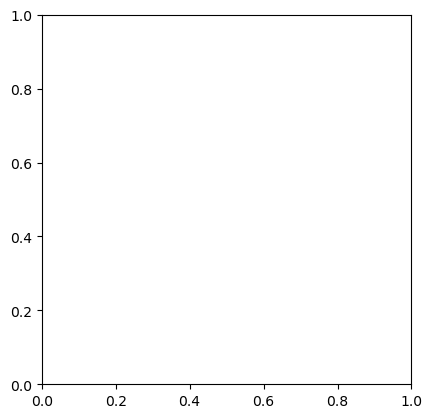

In [ ]:
plt.imshow(traj[10].cpu(), origin="lower", extent=[-0.5, 0.5, -0.5, 0.5])
plt.title("2/3 Dealiasing Mask")
plt.xlabel("kx")
plt.ylabel("ky")
plt.colorbar(label="Mask Value")

In [1]:
a = {'name': "aaveg"}

In [2]:
a

{'name': 'aaveg'}

In [16]:
b = a.get('age')

In [17]:
print(b)

None
